# Fraud Detection

In [1]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("data1/creditcard.csv",header=0)
df=df.set_index(df.columns.values[0])
# Explore the features available in your dataframe
#print(df.info())
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df.index))

0    7983
1      17
Name: Class, dtype: int64
0    0.997875
1    0.002125
Name: Class, dtype: float64


# Smote Resampling
Resampling can help model performance for imbalanced data sets

In [127]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

# Define the resampling method
method = SMOTE()
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)


0.7.0


In [128]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [129]:
# Create X and y from the prep_data function 
X, y = prep_data(df)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (8000, 28)
y shape: (8000,)


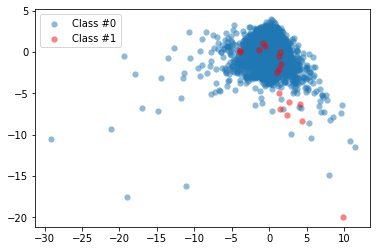

In [130]:
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()
plot_data(X,y)

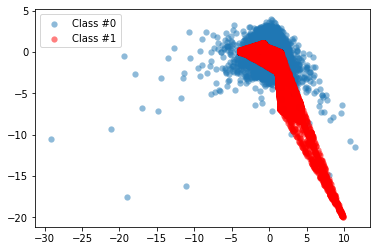

X_resampled shape: (15966, 28)
y_resampled shape: (15966,)


In [131]:
# Define the resampling method
method = SMOTE()
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)
# Plot the resampled data
plot_data(X_resampled, y_resampled)
print(f'X_resampled shape: {X_resampled.shape}\ny_resampled shape: {y_resampled.shape}')

In [132]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_resampled)))

0    7983
1      17
dtype: int64
1    7983
0    7983
dtype: int64


In [133]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

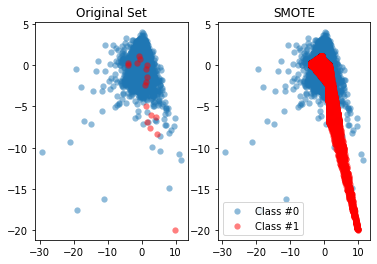

In [134]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

# Logistic regression with SMOTE resampling method

In [138]:
from imblearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2390
           1       0.25      0.60      0.35        10

    accuracy                           0.99      2400
   macro avg       0.62      0.80      0.67      2400
weighted avg       1.00      0.99      0.99      2400

Confusion matrix:
 [[2372   18]
 [   4    6]]


### Natural Accuracy

In [142]:
# Count the total number of non-fraudulent observations 
df = pd.read_csv("data1/creditcard2.csv",header=0)
df=df.set_index(df.columns.values[0])
X, y = prep_data(df)
total_obs = len(y)
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')

95.89%


Do nothing get correct in 95.9% of the cases. 
How to imporve the predicting fraud?

In [144]:
# Random Forest
# Split your data into training and test set
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestClassifier(random_state=5, n_estimators=5)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.3f}')
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

Accuracy Score:
1.000
ROC Score:
0.9999947646445979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       1.00      0.99      0.99        91

    accuracy                           1.00      2190
   macro avg       1.00      0.99      1.00      2190
weighted avg       1.00      1.00      1.00      2190


Confusion Matrix:
[[2099    0]
 [   1   90]]


Precision: [0.04155251 1.         1.        ]
Recall: [1.         0.98901099 0.        ]


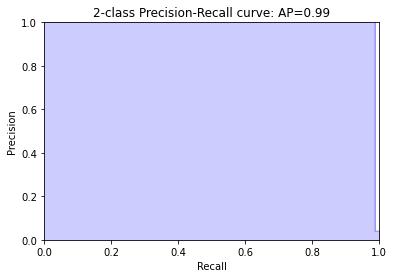

In [145]:
# Plotting the Precision vs. Recall Curve
average_precision = average_precision_score(y_test, predicted)
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')
def plot_pr_curve(recall, precision, average_precision):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()
plot_pr_curve(recall, precision, average_precision)

In [146]:
### Adjusting the Algorithm 
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5, n_estimators=100)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       1.00      1.00      1.00        91

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190


Confusion Matrix:
[[2099    0]
 [   0   91]]


In [147]:
### Adjusting RF for fraud detection
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))
    
    
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9991989906234785

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.96      0.86      0.91        91

    accuracy                           0.99      2190
   macro avg       0.98      0.93      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2096    3]
 [  13   78]]


In [148]:
# Parameter optimization with GridSearchCV
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [149]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9998534100487412

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.87      0.92        91

    accuracy                           0.99      2190
   macro avg       0.99      0.93      0.96      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2098    1]
 [  12   79]]


# K-means clustering for unlabled data

In [150]:
banksim_df = pd.read_csv('data1/banksim.csv',header=0)
banksim_df.drop(['Unnamed: 0'], axis=1, inplace=True)
banksim_adj_df = pd.read_csv('data1/banksim_adj.csv',header=0)
banksim_adj_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [151]:
banksim_df.groupby(['category']).mean()

,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


In [152]:
banksim_df.groupby(['age']).mean()

,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


In [153]:
banksim_df.age.value_counts()

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

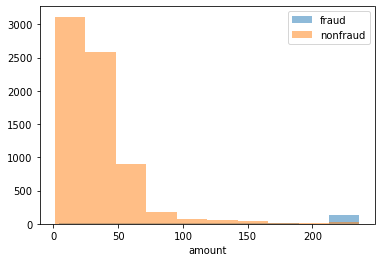

In [154]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = banksim_df[banksim_df.fraud == 1] 
df_non_fraud = banksim_df[banksim_df.fraud == 0]
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.xlabel('amount')
plt.legend()
plt.show()


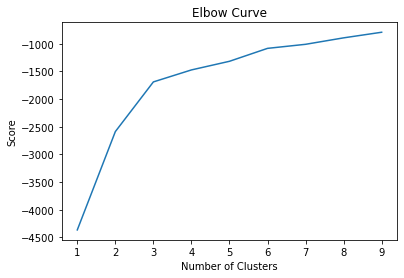

In [156]:
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
labels = banksim_adj_df.fraud
cols = ['age', 'amount', 'M', 'es_barsandrestaurants', 'es_contents',
        'es_fashion', 'es_food', 'es_health', 'es_home', 'es_hotelservices',
        'es_hyper', 'es_leisure', 'es_otherservices', 'es_sportsandtoys',
        'es_tech', 'es_transportation', 'es_travel']
# Take the float values of df for X
X = banksim_adj_df[cols].values.astype(np.float)
# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)
# Fit the model to the scaled data
kmeans.fit(X_scaled)
# Define the range of clusters to try
clustno = range(1, 10)
# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]
# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [157]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [161]:
from itertools import product
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

0.8109115999408585
Confusion matrix, without normalization


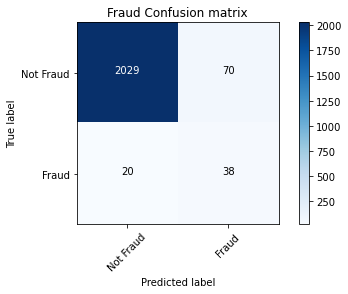

In [162]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))
# Create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm)

# Fraud detection using text


In [2]:
df = pd.read_csv('data1/enron_emails_clean.csv',header=0)
mask = df['clean_content'].str.contains('sell enron stock', na=False)
df[mask]

,Message-ID,From,To,Date,content,clean_content
154,<6336501.1075841154311.JavaMail.evans@thyme>,('sarah.palmer@enron.com'),('sarah.palmer@enron.com'),2002-02-01 14:53:35,\nJoint Venture: A 1997 Enron Meeting Belies O...,joint venture enron meeting belies officers cl...


In [4]:
import numpy as np
# Create a list of terms to search for
searchfor = ['enron stock', 'sell stock', 'stock bonus', 'sell enron stock']

# Filter cleaned emails on searchfor list and select from df 
filtered_emails = df[df.clean_content.str.contains('|'.join(searchfor), na=False)]

# Create flag variable where the emails match the searchfor terms
df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

# Count the values of the flag variable
count = df['flag'].value_counts()
print(count)

0    1776
1     314
Name: flag, dtype: int64


In [5]:
# Define stopwords to exclude
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
stop.update(("to", "cc", "subject", "http", "from", "sent", "ect", "u", "fwd", "www", "com", 'html'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chunx\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
import string
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)
# Import the lemmatizer from nltk
lemma = WordNetLemmatizer()

def clean(text, stop):
    text = str(text).rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized
# Clean the emails in df and print results
text_clean=[]
for text in df['clean_content']:
    text_clean.append(clean(text, stop).split())    
text_clean[0][:10]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chunx\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


['investools',
 'advisory',
 'free',
 'digest',
 'trusted',
 'investment',
 'advice',
 'unsubscribe',
 'free',
 'newsletter']

In [12]:
# Topic Modeling
from gensim import corpora
import gensim

# Define the dictionary
dictionary = corpora.Dictionary(text_clean)
# Define the corpus 
corpus = [dictionary.doc2bow(text) for text in text_clean]
print(dictionary)
corpus[0][:10]
# Define the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Save the topics and top 5 words
topics = ldamodel.print_topics(num_words=5)

# Print the results
for topic in topics:
    print(topic)

Dictionary(33980 unique tokens: ['account', 'accurate', 'acquiring', 'acre', 'address']...)
(0, '0.018*"enron" + 0.009*"company" + 0.006*"employee" + 0.005*"stock" + 0.005*"energy"')
(1, '0.040*"image" + 0.039*"td" + 0.028*"net" + 0.027*"money" + 0.025*"tr"')
(2, '0.041*"enron" + 0.009*"message" + 0.009*"original" + 0.008*"hou" + 0.007*"pm"')
(3, '0.011*"e" + 0.011*"enron" + 0.010*"mail" + 0.008*"message" + 0.008*"wj"')
(4, '0.015*"enron" + 0.011*"pm" + 0.008*"outage" + 0.007*"hou" + 0.006*"gas"')


In [13]:
# Flagging fraud based on topic
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [14]:
# Assign topics to your original data
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_details_df = topic_details_df.append(pd.Series([topic_num, prop_topic]), ignore_index=True)
    topic_details_df.columns = ['Dominant_Topic', '% Score']
    return topic_details_df


contents = pd.DataFrame({'Original text':text_clean})
topic_details = pd.concat([get_topic_details(ldamodel,
                           corpus), contents], axis=1)
topic_details.head()

,Dominant_Topic,% Score,Original text
0,0.0,0.981137,"[investools, advisory, free, digest, trusted, ..."
1,3.0,0.471583,"[forwarded, richard, b, sander, hou, pm, justi..."
2,2.0,0.557184,"[hey, wearing, target, purple, shirt, today, m..."
3,0.0,0.993455,"[leslie, milosevich, santa, clara, avenue, ala..."
4,0.0,0.993385,"[rini, twait, e, th, ave, longmont, co, rtwait..."


In [15]:
# Finding fraudsters based on topic
def get_topic_details(ldamodel, corpus):
    topic_details_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_details_df = topic_details_df.append(pd.Series([topic_num, prop_topic]), ignore_index=True)
    topic_details_df.columns = ['Dominant_Topic', '% Score']
    return topic_details_df
# Run get_topic_details function and check the results
topic_details_df = get_topic_details(ldamodel, corpus)
topic_details_df.head()

,Dominant_Topic,% Score
0,0.0,0.981137
1,3.0,0.471583
2,2.0,0.557185
3,0.0,0.993455
4,0.0,0.993385


In [16]:
# Add original text to topic details in a dataframe
contents = pd.DataFrame({'Original text': text_clean})
topic_details = pd.concat([get_topic_details(ldamodel, corpus), contents], axis=1)
topic_details.sort_values(by=['% Score'], ascending=False).head(10).head()

,Dominant_Topic,% Score,Original text
849,0.0,0.999872,"[original, message, received, thu, aug, cdt, e..."
2081,1.0,0.999631,"[unsubscribe, mailing, please, go, money, net,..."
2087,1.0,0.999321,"[image, image, image, image, image, image, ima..."
161,0.0,0.999103,"[today, headline, new, york, time, web, thursd..."
359,0.0,0.998947,"[dear, buy, giving, valued, customer, year, en..."


In [17]:
# Create flag for text highest associated with topic 3
topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)
topic_details_1 = topic_details[topic_details.flag == 1]
topic_details_1.sort_values(by=['% Score'], ascending=False).head(10)

,Dominant_Topic,% Score,Original text,flag
2076,3.0,0.997744,"[know, houston, suck, xo, j, original, message...",1
2060,3.0,0.995321,"[preparation, continuing, simulation, thursday...",1
2073,3.0,0.994988,"[hello, jason, monday, october, pm, wrote, wj,...",1
2059,3.0,0.993587,"[oh, yeah, forgot, ask, plan, coming, weekend,...",1
2074,3.0,0.993164,"[dear, friend, hot, deal, value, one, opt, sub...",1
2015,3.0,0.993099,"[sound, good, let, know, time, gonna, work, or...",1
2033,3.0,0.992126,"[dear, valued, customer, got, great, news, new...",1
2026,3.0,0.991238,"[schedule, change, athletic, director, wally, ...",1
743,3.0,0.990165,"[start, date, hourahead, hour, ancillary, sche...",1
1209,3.0,0.990144,"[start, date, hourahead, hour, ancillary, sche...",1


Flagged all data that is highest associated with topic 3